# Simulating the extraction from a long guide with gravity

# extraction without Gravity and finite circular beam
## Simulation of data

In [6]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 1e7
pd = sim.params_dict
pd['g'] = 0
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1
mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1 -c -n 10000000.0
CompletedProcess(args=['mcrun', '/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr', 'det_width=0.218', 'det_width_focus=0.03', 'source_width=0.03', 'guide_width=0.218', 'L_source=

## Data from hard to handle mcstas save folder to easier data dict

In [7]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Evaluation and plotting of data
### Here with gravity

g1_psd.dat
[-12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10.   12.5]
intensity 0.712336626951434
49.508255408564494 49.48211607115531 [-10.9, 10.9, -10.9, 10.9]
-0.003938077260748685 0.0018178576434948468
6.758000000000001 0.3
8.72 0.5
10.246000000000002 0.7
g1_divv_lambda.dat
f_divv_lambda.dat
f_psd.dat
[-12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10.   12.5]
intensity 0.6792230272246189
49.510603341664584 49.48837871940627 [-10.9, 10.9, -10.9, 10.9]
-0.0025590294640736033 0.002334877255432133
1.308 0.3
2.8340000000000005 0.5
5.232 0.7
source_psd.dat
[-12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5  10.   12.5]
intensity 1.1927620888517316
49.49821074973065 49.49801792994576 [-10.9, 10.9, -10.9, 10.9]
-0.0004364558301244159 -0.00039399652395744056
0.872 0.3
1.09 0.5
1.308 0.7
f_psd_zoom.dat
[-1.5 -1.  -0.5  0.   0.5  1.   1.5]
intensity 0.2695413340291442
49.51729301340165 49.48113249327763 [-1.5, 1.5, -1.5, 1.5]
-0.0005717426279505666 0.0005240307091409768


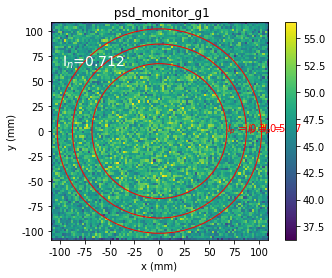

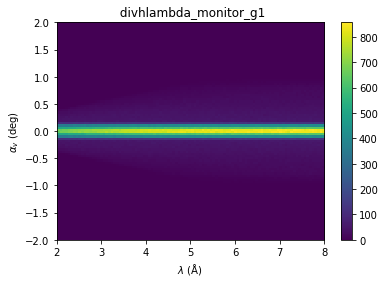

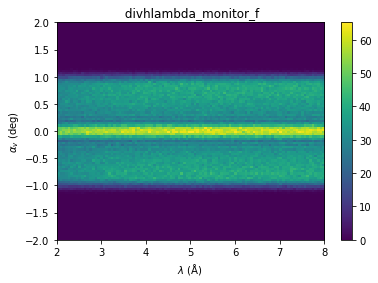

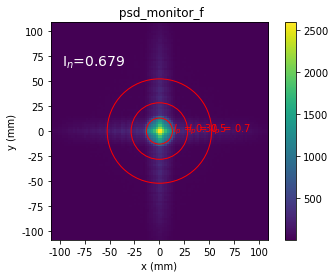

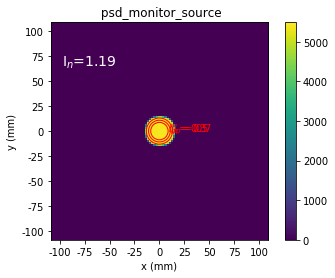

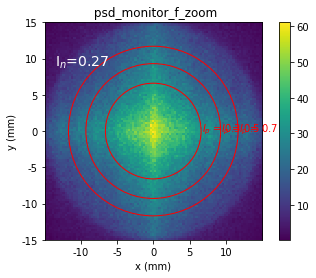

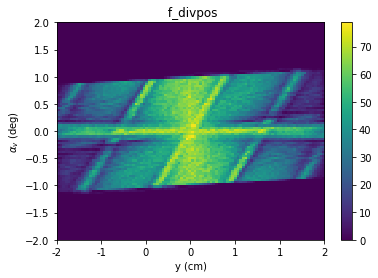

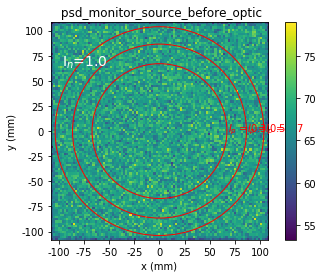

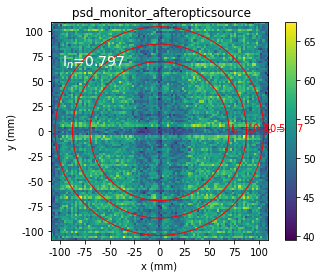

In [8]:
import image_thresholds
import numpy as np
import matplotlib.pyplot as plt
with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    meta_dict = pickle.load(file)


#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_dict, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_dict[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        print(midy, midx, extent)
        figax = fig, ax
        image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
             figax=figax, extent=extent, thresholds=[0.30, 0.5, 0.70])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    #fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))


# Exraction from long guide finite beamspot and gravity
## Simulation of data


In [3]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/','parabolic_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03
sim.num_neutrons = 5e7
gravity = -9.81

sim.gravity = True if gravity else False
pd = sim.params_dict
pd['g'] = gravity
pd['incoming_length'] = 5000
pd['source_width'] = source_width
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 2.5
pd['guide_length'] = 160
pd['guide_width'] = 0.218
pd['pixels'] = 100
pd['mirrors'] = 60
pd['focal_length'] = 6.0
pd['det_width'] = 0.218
pd['det_width_focus'] = 0.03
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
#print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/extraction_parabolic_guide_nested_mirror_paper/parabolic_extraction.instr --gravity det_width=0.218 det_width_focus=0.03 source_width=0.03 guide_width=0.218 L_source=5 guide_length=160 dL=3 L_min=2 L_max=8 source_divergence=2.5 divergence_max=1 focal_length=6.0 mirrors=60 incoming_length=5000 g=-9.81 max_div=10 pixels=100 flux=50000000.0 placeholder=1


In [4]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()
print('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']))
with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

data/data_finite_g_length160finite_beamspot.txt


## Import data from pickle files

this 31397.0
g1_psd.dat
0.0014019949612986693 -1.2933752027561702
no suc 1.0309278350515463
8.066 0.44182621502209124
10.464 0.7363770250368188


<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


source_psd_beforeoptic.dat
0.0011630765482575356 -0.0028112159116702173
no suc 1.0309278350515463
8.219932 0.44182621502209124
10.599385999999999 0.7363770250368188
g1_divpos.dat
f_divpos.dat


<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-9ff7924e7689>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
<ipython-input-4-9ff7924e7689>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])


sourceafteroptic_psd.dat
0.0020558004927782036 -0.005175461380304114
no suc 1.0309278350515463
8.283999999999999 0.44182621502209124
10.682 0.7363770250368188
g1_divv_lambda.dat
f_divv_lambda.dat


<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


source_psd.dat
-4.7028432762274974e-05 -2.4677732190170332e-05
no suc 1.0309278350515463
1.09 0.44182621502209124
1.308 0.7363770250368188
f_psd.dat
-9.354602263478284e-05 -0.3660998765381329
no suc 1.0309278350515463
2.398 0.44182621502209124
5.886 0.7363770250368188
f_psd_zoom.dat


<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
<ipython-input-4-9ff7924e7689>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])


0.0005301455891788542 -0.06285219041141543
no suc 1.0309278350515463
0.87 0.44182621502209124
1.23 0.7363770250368188


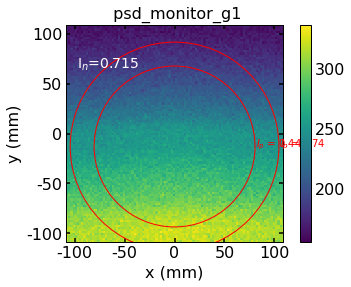

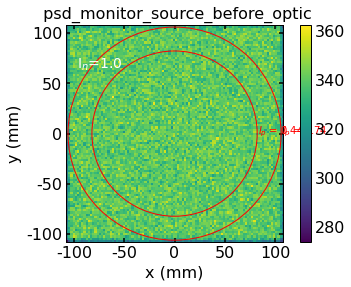

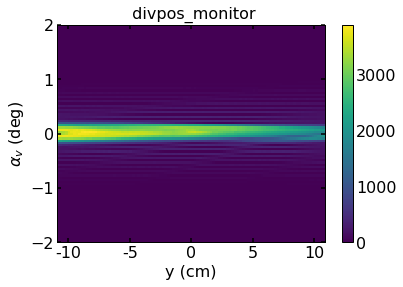

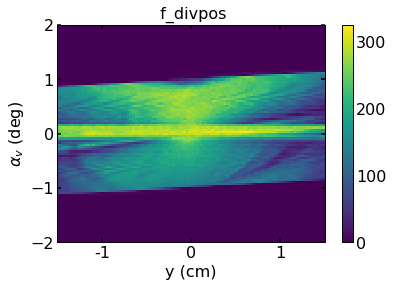

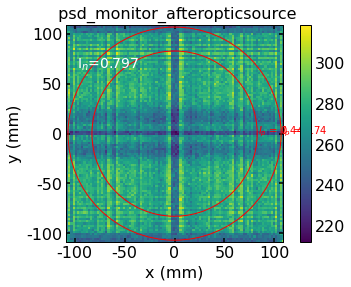

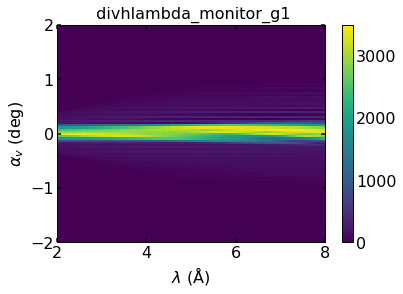

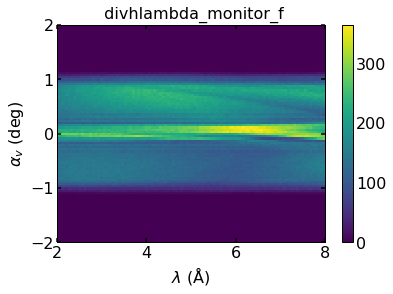

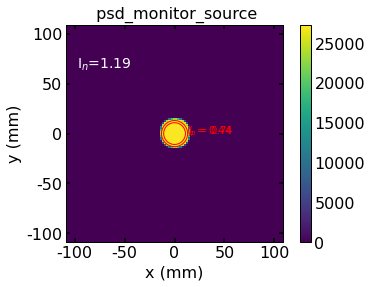

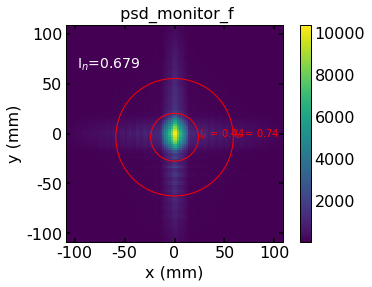

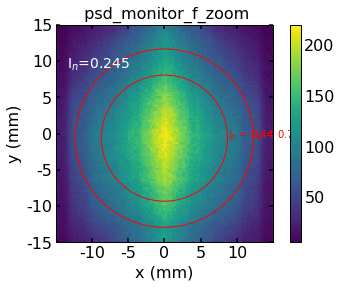

In [4]:
import image_thresholds
import pickle
with open('data/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    meta_data= pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        #print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        #print(midy, midx, extent)
        figax = fig, ax
        image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
             figax=figax, extent=extent, thresholds=[k/0.679 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        #print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if float(meta_data[key][' g']) == 0 else 'finite'))

# Plot radius vs intensity for detector in the focal point, here we use the bigger area, while the smaller might be more sensible

0.0
2.2222222222222223
4.444444444444445
6.666666666666667
8.88888888888889
11.11111111111111
13.333333333333334
15.555555555555557
17.77777777777778
20.0


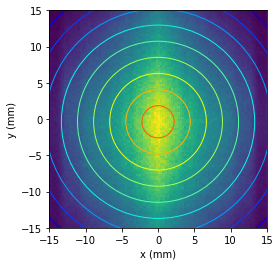

In [16]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import patches

number_circles = 10
colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]

with open('data/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    meta_dict = pickle.load(file)
image_data.keys()
# create the image to then plot the cirlces for the inset
im_array = image_data['f_psd.dat'][:100]
fig, ax = plt.subplots(1)
height = width = 218
im = ax.imshow(im_array, interpolation='none', origin='lower', extent=(-height/2, height/2, -width/2, width/2))
ax.set_yticks([-100, 0, 100])
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
for ind, rad_ex in enumerate(np.linspace(0, 135, 135//15+1)):
    
    print(rad_ex)
    circ = patches.Circle((0, -0.37), radius=rad_ex, fc='none', edgecolor=colors[ind])
    ax.add_patch(circ)
#circ = patches.Circle((0, -0.37), radius=100, fc='none', edgecolor=colors[ind])
#ax.add_patch(circ)
fig.savefig('figures/radii_demonstration.pdf', bbox_inches='tight')

49.49957518090638 47.83743634049197
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270.] [0.         0.225893   0.34801057 0.43636801 0.51203216 0.57526865
 0.62668485 0.66174372 0.67505068 0.67912679]
49.49978643051177 49.499887931399684
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270.] [0.         0.96414077 1.         1.         1.         1.
 1.         1.         1.         1.        ]


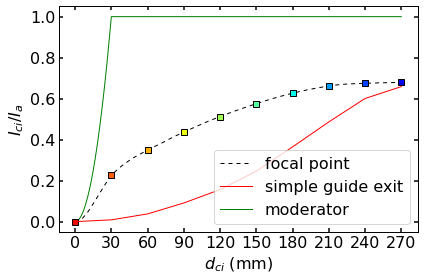

In [5]:
import matplotlib.pyplot as plt
import image_thresholds

# focusing detector
array = image_data['f_psd.dat'][:100]
number_circles = 10
colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]
mid_y, mid_x = image_thresholds.return_com_array(array)
print(mid_x, mid_y)
radint = image_thresholds.radius_vs_content(array, mid_x = mid_x, mid_y=mid_y, radii=np.linspace(0, 135/218*100, number_circles))
radint_line = image_thresholds.radius_vs_content(array, mid_x=mid_x, mid_y=mid_y, radii=np.linspace(0, 135/218*100, 50))
fig, ax = plt.subplots(1)
x, y = zip(*radint)
y = np.array(y)*0.681
x = np.array(x)/100*218*2#diameter instead of radius
x_line, y_line = zip(*radint_line)
x_line, y_line = np.array(x_line)/100*218*2, np.array(y_line)*0.681#diameter instead of radius
print(x, y)
for ind, xval in enumerate(x):
    line, = ax.plot(x[ind], y[ind], linestyle='-', markeredgewidth=1, color = colors[ind])
line, = ax.plot(x_line, y_line, marker=' ', linestyle='-', color='black', zorder=-5)
line.set_dashes([4, 4])
line.set_label('focal point')
ax.set_xlabel(r'$d_{ci}$ (mm)')
ax.set_ylabel(r'$I_{ci}/I_{a}$')
ax.set_xticks(np.linspace(0, 135*2, 135//15+1))

# simple guide exit
X, Y = np.meshgrid(range(218), range(218))
int_flat = [np.sum(np.ones((218, 218))[(X-109)**2 + (Y-109)**2 <= r**2])/218**2*0.681 for r in x//2]
ax.plot(x, int_flat, linestyle='-', marker=' ', label='simple guide exit')


#moderator
array = image_data['source_psd.dat'][:100]
number_circles = 10
colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]
mid_y, mid_x = image_thresholds.return_com_array(array)
print(mid_x, mid_y)
radint = image_thresholds.radius_vs_content(array, mid_x = mid_x, mid_y=mid_y, radii=np.linspace(0, 135/218*100, number_circles))
radint_line = image_thresholds.radius_vs_content(array, mid_x=mid_x, mid_y=mid_y, radii=np.linspace(0, 135/218*100, 100))
x, y = zip(*radint)
y = np.array(y)*1
x = np.array(x)/100*218*2#diameter instead of radius
x_line, y_line = zip(*radint_line)
x_line, y_line = np.array(x_line)/100*218*2, np.array(y_line)#diameter instead of radius
print(x, y)
#for ind, xval in enumerate(x):
#    line, = ax.plot(x[ind], y[ind], linestyle='-', markeredgewidth=1, color = colors[ind])
line, = ax.plot(np.linspace(0, 270, 541), [min(1, k) for k in  np.linspace(0, 270, 541)**2/30**2], marker=' ', linestyle='-', color='green', zorder=-5)
line.set_label('moderator')
#line.set_dashes([4, 4])


plt.tight_layout()
ax.legend(fontsize=16)
fig.savefig('figures/int_vs_rad_n.pdf', bbox_inches='tight')# test for the smaller monitor

# same figure on a much smaller scale

0.05
2.5
5.0
7.5
10.0
12.5
15.0


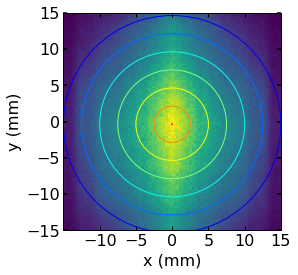

In [63]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import patches
circles = np.array([0.1, 5, 10, 15, 20, 25, 30])/2
number_circles = len(circles)
colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]

with open('data/data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_finite_g_length160finite_beamspot.txt', 'rb') as file:
    meta_dict = pickle.load(file)
image_data.keys()
# create the image to then plot the cirlces for the inset
im_array = image_data['f_psd_zoom.dat'][:100]
fig, ax = plt.subplots(1)
height = width = 30
im = ax.imshow(im_array, interpolation='none', origin='lower', extent=(-height/2, height/2, -width/2, width/2))
#ax.set_yticks([-100, 0, 100])
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_xticks([-10, -5, 0, 5, 10, 15])
for ind, rad_ex in enumerate(circles):
    
    print(rad_ex)
    circ = patches.Circle((0, -0.37), radius=rad_ex, fc='none', edgecolor=colors[ind])
    ax.add_patch(circ)
#circ = patches.Circle((0, -0.37), radius=100, fc='none', edgecolor=colors[ind])
#ax.add_patch(circ)
fig.savefig('figures/radii_demonstration.pdf', bbox_inches='tight')

49.517494804442904 47.42587771642329
[(0.16666666666666669, 0.0), (8.333333333333332, 0.05030221565016272), (16.666666666666664, 0.18108729288698872), (25.0, 0.35872919801884795), (33.33333333333333, 0.5560056098471174), (41.66666666666667, 0.7571534686143516), (50.0, 0.9258977078275816)] [(0.0, 0.0), (1.0204081632653061, 0.0010297622116199974), (2.0408163265306123, 0.0030795816708788725), (3.061224489795918, 0.008060668931676236), (4.081632653061225, 0.012965309954549312), (5.102040816326531, 0.020437192593827792), (6.122448979591836, 0.029114976513687576), (7.142857142857142, 0.03850111448948833), (8.16326530612245, 0.04899039902157312), (9.183673469387756, 0.06091111249097072), (10.204081632653063, 0.07580734624316048), (11.224489795918368, 0.08836218505666228), (12.244897959183673, 0.10382647214226737), (13.26530612244898, 0.11977863553042609), (14.285714285714285, 0.1376045254312888), (15.306122448979592, 0.15462428830982905), (16.3265306122449, 0.17291943962214346), (17.346938775

/home/cherb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


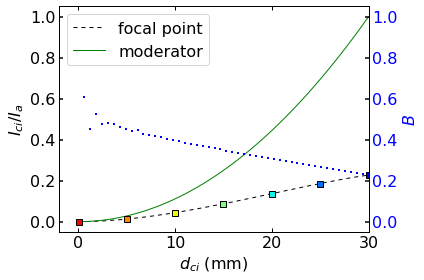

In [64]:
import matplotlib.pyplot as plt
import image_thresholds
plt.style.use("/home/cherb/LRZSync/Doktorarbeit/Vorlagen_Verschiedenes/stylelibs/christoph.mplstyle")
# focusing detector
array = image_data['f_psd_zoom.dat'][:100]
#colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]
mid_y, mid_x = image_thresholds.return_com_array(array)
print(mid_x, mid_y)
radint = image_thresholds.radius_vs_content(array, mid_x = mid_x, mid_y=mid_y, radii=circles/30*100)
radint_line = image_thresholds.radius_vs_content(array, mid_x=mid_x, mid_y=mid_y, radii=np.linspace(0, np.max(circles), 50)/30*100)

print(radint, radint_line)
fig, ax = plt.subplots(1)
x, y = zip(*radint)
y = np.array(y)*0.245
x = np.array(x)/100*30*2#diameter instead of radius
x_line, y_line = zip(*radint_line)
x_line, y_line = np.array(x_line)/100*30*2, np.array(y_line)*0.245#diameter instead of radius
print(x, y)
for ind, xval in enumerate(x):
    line, = ax.plot(x[ind], y[ind], linestyle='-', markeredgewidth=1, color = colors[ind], marker='s')
line, = ax.plot(x_line, y_line, marker=' ', linestyle='-', color='black', zorder=-5)
line.set_dashes([4, 4])
line.set_label('focal point')
ax.set_xlabel(r'$d_{ci}$ (mm)')
ax.set_ylabel(r'$I_{ci}/I_{a}$')
#ax.set_xticks(np.linspace(0, 135*2, 135//15+1))

# simple guide exit
#X, Y = np.meshgrid(range(30), range(30))
#int_flat = [np.sum(np.ones((30, 30))[(X-15)**2 + (Y-15)**2 <= r**2])/30**2*0.245 for r in x//2]
#ax.plot(x, int_flat, linestyle='-', marker=' ', label='simple guide exit')
#
#
#moderator
array = image_data['source_psd.dat'][:100]
number_circles = 10
#colors = plt.cm.jet(np.linspace(0.1, 0.9, number_circles))[::-1]

#for ind, xval in enumerate(x):
#    line, = ax.plot(x[ind], y[ind], linestyle='-', markeredgewidth=1, color = colors[ind])
mod_b = np.array([min(1, k) for k in  np.linspace(0, 30, len(y_line))**2/30**2])
line, = ax.plot(np.linspace(0, 30, len(y_line)), mod_b, marker=' ', linestyle='-', color='green', zorder=-5)
line.set_label('moderator')
#line.set_dashes([4, 4])
ax.set_xlim(-2, 30)

ax2 = ax.twinx()
line, = ax2.plot(np.linspace(0, 30, len(y_line)), y_line/mod_b, label='$B$', marker='s', linestyle=' ', markersize=2, markeredgewidth=0, color='blue')
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel('$B$', color = line.get_color())
ax2.tick_params(axis='y', colors='blue')
plt.tight_layout()
ax.legend(fontsize=16)
fig.savefig('figures/int_vs_rad_n.pdf', bbox_inches='tight')# test for the smaller monitor

# ESS geometry without gravity


In [1]:
import run_mcstas
import matplotlib.patches as patches
import pickle
sim = run_mcstas.McstasSimulation('/home/cherb/Documents/McStas/ess_moderator_extraction/','ess_extraction.instr')
sim.init_params_dict()

#parameter insertion

source_width = 0.03*100
sim.num_neutrons = 1e7
pd = sim.params_dict
pd['g'] = 0
pd['incoming_length'] = 5000
pd['source_width'] = source_width/100
pd['det_width_focus'] = source_width/100
pd['flux'] = sim.num_neutrons
pd['source_divergence'] = 0.8
pd['guide_length'] = 160
pd['pixels'] = 100
pd['mirrors'] = 20
pd['focal_length'] = 2.5
pd['placeholder'] = 1

#Simulation process

mcstring = sim.return_string_from_dict(pd)
print(mcstring)
#print(sim.run_simulation(mcstring=mcstring, output=False))


mcrun /home/cherb/Documents/McStas/ess_moderator_extraction/ess_extraction.instr det_width=0.2 det_width_focus=0.03 source_width=0.03 guide_width=0.1 L_source=4 guide_length=160 dL=1 L_min=3 L_max=5 source_divergence=0.8 divergence_max=1 focal_length=2.5 mirrors=20 incoming_length=5000 g=0 max_div=10 pixels=100 flux=10000000.0 placeholder=1


In [2]:
import pickle
image_data = sim.return_images_data()
meta_data = sim.return_images_metadata()

with open('data/data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(image_data, file)
with open('data/meta_data_{}_g_length{}finite_beamspot.txt'.format('finite' if pd['g'] else 'zero', pd['guide_length']), 'wb') as file:
    pickle.dump(meta_data, file)

## Import data from pickle files

In [2]:
with open('data/data_zero_g_length160.txt', 'rb') as file:
    image_data = pickle.load(file)
with open('data/meta_data_zero_g_length160.txt', 'rb') as file:
    image_metadata = pickle.load(file)

#Monitor directly after the source serves as normalizing value for intensity data
#norm = np.sum(image_data['source_psd.dat'])

images = sim.plot_last_images(meta_dicts=meta_data, image_data_dicts=image_data )
norm = image_data['source_psd_beforeoptic.dat']

for key in images.keys():
    print(key)
    fig, ax = images[key]
    if 'psd.' in key or '_psd_' in key: 
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        print(ax.get_yticks())
        ax.set_xticks(ax.get_yticks()[1:-1])
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
        midy, midx = image_thresholds.return_com_array(image_data[key][:100])
        extent=[float(k) for k in meta_data[key][' xylimits'].split(' ')[1:]]
        #midy, midx = midy/99*21.8-21.8/2, midx/99*21.8-21.8/2
        print(midy, midx, extent)
        figax = fig, ax
        image_thresholds.plot_thresholds_circle(image_data[key][:100], xmid_px=midx, ymid_px=midy,\
             figax=figax, extent=extent, thresholds=[k/0.681 for k in [0.30, 0.5, 0.70]])
    
    elif 'zoom' in key:
        ax.set_ylabel(r'y (mm)')
        ax.set_xlabel(r'x (mm)')
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(round(k*10)) for k in ax.get_xticks()])
        ax.set_yticklabels([int(round(k*10)) for k in ax.get_yticks()])

        #rect = patches.Rectangle((-source_width/2, -source_width/2), source_width, source_width, linewidth=1, edgecolor='r', facecolor='none')
        #ax.add_patch(rect)
        width = norm.shape[1]
        print('intensity', np.sum(image_data[key][:width])/np.sum(norm[:width]))
        ratio = sim.compare_image_intensities(image_data[key][:width], norm[:width])
        ax.text(0.05, 0.8, r'I$_n$={:.3}'.format(ratio), transform=ax.transAxes, color='white', fontsize=14)
    
    ylabel = ax.get_ylabel()
    if 'divergence' in ylabel:
        ax.set_ylabel(r'$\alpha_v$ (deg)')
        if 'avelength' not in ax.get_xlabel():
            ax.set_xticklabels([int(round(k*100)) for k in ax.get_xticks()])
    if 'avelength' in ax.get_xlabel():
        ax.set_xlabel(r'$\lambda\ (\mathrm{\AA})$ ')
    if 'pos' in ax.get_xlabel():
        ax.set_xlabel(r'y (cm)')    
    print(float(meta_data[key][' g']))
    fig.savefig('figures/{}_{}gravity.pdf'.format(key.split('.')[0], 'zero' if 0 == 0 else 'finite'))

NameError: name 'meta_data' is not defined

In [15]:
print(pd['g'])

0
